In [2]:
# pip install pyodbc

In [3]:
# pip install sqlalchemy

In [4]:
# pip install pandas

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px


In [6]:
import pyodbc

# Replace with your SQL Server details
server = 'LAPTOP-BG7UNJA8\SQLEXPRESS'  # e.g., 'localhost\SQLEXPRESS' or '192.168.1.100,1433'
database = 'employee'
username = 'taluser'
password = 'taluser123'

# Create connection string
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                      f'SERVER={server};'
                      f'DATABASE={database};'
                      f'UID={username};'
                      f'PWD={password}')

cursor = conn.cursor()

# Test connection by fetching tables
cursor.execute("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES")
for table in cursor.fetchall():
    print(table)

cursor.close()
conn.close()


('sysdiagrams', )
('one', )
('departments', )
('dept_emp', )
('dept_manager', )
('employees', )
('salaries', )
('titles', )


In [7]:
import pyodbc

# Replace with your SQL Server details
server = 'LAPTOP-BG7UNJA8\SQLEXPRESS'  # e.g., 'localhost\SQLEXPRESS' or '192.168.1.100,1433'
database = 'employee'
username = 'taluser'
password = 'taluser123'

# Establish connection
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                      f'SERVER={server};'
                      f'DATABASE={database};'
                      f'UID={username};'
                      f'PWD={password}')

cursor = conn.cursor()

# Fetch data from a specific table
query = "SELECT TOP 10 * FROM one"  # Replace 'your_table' with a real table name
cursor.execute(query)

# Fetch and print results
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()


(10001, 'd005', 'development', 'e0003', 'Senior Engineer', datetime.date(1953, 2, 9), 'Georgi', 'Facello', 'M', datetime.date(1986, 6, 26), 9, 'C', True, datetime.date(1994, 7, 30), 60117)
(10002, 'd007', 'Sales', 's0001', 'Staff', datetime.date(1964, 2, 6), 'Bezalel', 'Simmel', 'F', datetime.date(1985, 11, 21), 8, 'B', False, None, 65828)
(10003, 'd004', 'Production', 'e0003', 'Senior Engineer', datetime.date(1959, 3, 12), 'Parto', 'Bamford', 'M', datetime.date(1986, 8, 28), 1, 'C', False, None, 40006)
(10004, 'd004', 'Production', 'e0003', 'Senior Engineer', datetime.date(1954, 1, 5), 'Chirstian', 'Koblick', 'M', datetime.date(1986, 1, 12), 5, 'A', False, None, 40054)
(10005, 'd003', 'Human Resources', 's0001', 'Staff', datetime.date(1955, 1, 21), 'Kyoichi', 'Maliniak', 'M', datetime.date(1989, 12, 9), 6, 'A', False, None, 78228)
(10006, 'd005', 'development', 'e0003', 'Senior Engineer', datetime.date(1953, 4, 20), 'Anneke', 'Preusig', 'F', datetime.date(1989, 2, 6), 10, 'B', False, 

In [8]:
import pandas as pd
import pyodbc

# Establish connection
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                      f'SERVER={server};'
                      f'DATABASE={database};'
                      f'UID={username};'
                      f'PWD={password}')

# Load SQL data into Pandas DataFrame
query = "SELECT * FROM one"  # final table 'one' is loaded
df = pd.read_sql(query, conn)

# Show the first 5 rows
print(df.head())

conn.close()


C:\Users\saite\AppData\Local\Temp\ipykernel_20984\899472565.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   emp_no dept_no        dept_name emp_title_id            title  birth_date  \
0   10001    d005      development        e0003  Senior Engineer  1953-02-09   
1   10002    d007            Sales        s0001            Staff  1964-02-06   
2   10003    d004       Production        e0003  Senior Engineer  1959-03-12   
3   10004    d004       Production        e0003  Senior Engineer  1954-01-05   
4   10005    d003  Human Resources        s0001            Staff  1955-01-21   

  first_name last_name sex   hire_date  no_of_projects  \
0     Georgi   Facello   M  1986-06-26               9   
1    Bezalel    Simmel   F  1985-11-21               8   
2      Parto   Bamford   M  1986-08-28               1   
3  Chirstian   Koblick   M  1986-01-12               5   
4    Kyoichi  Maliniak   M  1989-12-09               6   

  Last_performance_rating   left   last_date  salary  
0                       C   True  1994-07-30   60117  
1                       B  False        None   65828  
2    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   emp_no                   331603 non-null  int64 
 1   dept_no                  331603 non-null  object
 2   dept_name                331603 non-null  object
 3   emp_title_id             331603 non-null  object
 4   title                    331603 non-null  object
 5   birth_date               331603 non-null  object
 6   first_name               331603 non-null  object
 7   last_name                331603 non-null  object
 8   sex                      331603 non-null  object
 9   hire_date                331603 non-null  object
 10  no_of_projects           331603 non-null  int64 
 11  Last_performance_rating  331603 non-null  object
 12  left                     331603 non-null  bool  
 13  last_date                33021 non-null   object
 14  salary              

In [10]:
#copied the data frame to emp_df
emp_df=df.copy()

In [11]:
#converting object datatype to datetime
emp_df['hire_date'] = pd.to_datetime(emp_df['hire_date'])

In [12]:
#converting object datatype to datetime
emp_df['birth_date'] = pd.to_datetime(emp_df['birth_date'])

In [13]:
#converting object datatype to datetime
emp_df['last_date'] = pd.to_datetime(emp_df['last_date'])

In [14]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   emp_no                   331603 non-null  int64         
 1   dept_no                  331603 non-null  object        
 2   dept_name                331603 non-null  object        
 3   emp_title_id             331603 non-null  object        
 4   title                    331603 non-null  object        
 5   birth_date               331603 non-null  datetime64[ns]
 6   first_name               331603 non-null  object        
 7   last_name                331603 non-null  object        
 8   sex                      331603 non-null  object        
 9   hire_date                331603 non-null  datetime64[ns]
 10  no_of_projects           331603 non-null  int64         
 11  Last_performance_rating  331603 non-null  object        
 12  left            

In [15]:
emp_df['hire_year']=emp_df['hire_date'].dt.year
emp_df['hire_year']


0         1986
1         1985
2         1986
3         1986
4         1989
          ... 
331598    1993
331599    1990
331600    1986
331601    1993
331602    1997
Name: hire_year, Length: 331603, dtype: int32

In [16]:
# Filter employees who were hired in 1986
emp_df.loc[emp_df['hire_date'].dt.year == 1986, ['first_name', 'last_name', 'hire_date']]


,first_name,last_name,hire_date
0,Georgi,Facello,1986-06-26
2,Parto,Bamford,1986-08-28
3,Chirstian,Koblick,1986-01-12
57,Sanjiv,Zschoche,1986-04-02
71,Kwee,Schusler,1986-02-26
...,...,...,...
331537,Yolla,Auria,1986-04-25
331543,Barton,Soicher,1986-02-21
331583,Mohammed,Pleszkun,1986-02-21
331590,Bangqing,Kleiser,1986-06-06


In [17]:
emp_df

,emp_no,dept_no,dept_name,emp_title_id,title,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,salary,hire_year
0,10001,d005,development,e0003,Senior Engineer,1953-02-09,Georgi,Facello,M,1986-06-26,9,C,True,1994-07-30,60117,1986
1,10002,d007,Sales,s0001,Staff,1964-02-06,Bezalel,Simmel,F,1985-11-21,8,B,False,NaT,65828,1985
2,10003,d004,Production,e0003,Senior Engineer,1959-03-12,Parto,Bamford,M,1986-08-28,1,C,False,NaT,40006,1986
3,10004,d004,Production,e0003,Senior Engineer,1954-01-05,Chirstian,Koblick,M,1986-01-12,5,A,False,NaT,40054,1986
4,10005,d003,Human Resources,s0001,Staff,1955-01-21,Kyoichi,Maliniak,M,1989-12-09,6,A,False,NaT,78228,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331598,499995,d004,Production,e0002,Engineer,1958-09-24,Dekang,Lichtner,F,1993-12-01,5,B,False,NaT,40000,1993
331599,499996,d004,Production,e0003,Senior Engineer,1953-07-03,Zito,Baaz,M,1990-09-27,8,B,True,1995-12-15,58058,1990
331600,499997,d005,development,e0003,Senior Engineer,1961-03-08,Berhard,Lenart,M,1986-04-21,10,B,False,NaT,49597,1986
331601,499998,d002,Finance,s0001,Staff,1956-05-09,Patricia,Breugel,M,1993-10-13,1,B,False,NaT,40000,1993


In [18]:
#1. A list showing employee number, last name, first name, sex, and salary for each employee

# emp_df[['emp_no','first_name','last_name','salary']]

# for col in ['emp_no','first_name','last_name','salary']:
#     unique_v=df[col].unique()
#     # print(f"df{[col]}")
#     print(f"{col}: {unique_v}")

# Create filtered unique employees dataset
unique_filtered_employees = emp_df.drop_duplicates(subset=['emp_no']).copy()
unique_filtered_employees[['emp_no','first_name','last_name','salary']]


,emp_no,first_name,last_name,salary
0,10001,Georgi,Facello,60117
1,10002,Bezalel,Simmel,65828
2,10003,Parto,Bamford,40006
3,10004,Chirstian,Koblick,40054
4,10005,Kyoichi,Maliniak,78228
...,...,...,...,...
331598,499995,Dekang,Lichtner,40000
331599,499996,Zito,Baaz,58058
331600,499997,Berhard,Lenart,49597
331601,499998,Patricia,Breugel,40000


In [19]:
#2. A list showing first name, last name, and hire date for employees who were hired in 1986.

emp_df.loc[emp_df['hire_date'].dt.year == 1986,['first_name','last_name','hire_date']]

,first_name,last_name,hire_date
0,Georgi,Facello,1986-06-26
2,Parto,Bamford,1986-08-28
3,Chirstian,Koblick,1986-01-12
57,Sanjiv,Zschoche,1986-04-02
71,Kwee,Schusler,1986-02-26
...,...,...,...
331537,Yolla,Auria,1986-04-25
331543,Barton,Soicher,1986-02-21
331583,Mohammed,Pleszkun,1986-02-21
331590,Bangqing,Kleiser,1986-06-06


In [20]:
#3. A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

emp_df.loc[emp_df['title']=='Manager',['dept_no','dept_name','emp_no','last_name','first_name']]

,dept_no,dept_name,emp_no,last_name,first_name
110521,d001,Marketing,110022,Markovitch,Margareta
110522,d001,Marketing,110039,Minakawa,Vishwani
110523,d002,Finance,110085,Alpin,Ebru
110524,d002,Finance,110114,Legleitner,Isamu
110525,d003,Human Resources,110183,Ossenbruggen,Shirish
110526,d003,Human Resources,110228,Sigstam,Karsten
110527,d004,Production,110303,Wegerle,Krassimir
110528,d004,Production,110344,Cools,Rosine
110529,d004,Production,110386,Kieras,Shem
110530,d004,Production,110420,Ghazalie,Oscar


In [21]:
#4. A list showing the department of each employee with the following information: employee number, last name, first name, and department name.

emp_df[['emp_no','last_name','first_name','dept_name']]

,emp_no,last_name,first_name,dept_name
0,10001,Facello,Georgi,development
1,10002,Simmel,Bezalel,Sales
2,10003,Bamford,Parto,Production
3,10004,Koblick,Chirstian,Production
4,10005,Maliniak,Kyoichi,Human Resources
...,...,...,...,...
331598,499995,Lichtner,Dekang,Production
331599,499996,Baaz,Zito,Production
331600,499997,Lenart,Berhard,development
331601,499998,Breugel,Patricia,Finance


In [22]:
# 5. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

unique_filtered_employees.loc[(emp_df['first_name']== 'Hercules') & (emp_df['last_name'].str.startswith('B')) ,['first_name','last_name','sex']]

,first_name,last_name,sex
310,Hercules,Benzmuller,M
1475,Hercules,Brendel,F
11914,Hercules,Baranowski,M
13121,Hercules,Barreiro,M
31132,Hercules,Baer,M
87738,Hercules,Bernardinello,F
88249,Hercules,Basagni,M
89208,Hercules,Biran,F
121704,Hercules,Bernatsky,M
125524,Hercules,Bail,F


In [23]:
#6. A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.

emp_df.loc[(emp_df['dept_name']=='Sales') ,['emp_no','last_name','first_name','dept_name']]

,emp_no,last_name,first_name,dept_name
1,10002,Simmel,Bezalel,Sales
16,10016,Cappelletti,Kazuhito,Sales
36,10034,Swan,Bader,Sales
44,10041,Lenart,Uri,Sales
54,10050,Dredge,Yinghua,Sales
...,...,...,...,...
331577,499976,Felder,Guozhong,Sales
331581,499980,Usery,Gino,Sales
331588,499986,Ranta,Nathan,Sales
331589,499987,Dusink,Rimli,Sales


In [24]:
# 7. A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

emp_df.loc[(emp_df['dept_name']=='Sales') | (emp_df['dept_name']=='development'),['emp_no','last_name','first_name','dept_name']]

,emp_no,last_name,first_name,dept_name
0,10001,Facello,Georgi,development
1,10002,Simmel,Bezalel,Sales
5,10006,Preusig,Anneke,development
7,10008,Kalloufi,Saniya,development
12,10012,Bridgland,Patricio,development
...,...,...,...,...
331588,499986,Ranta,Nathan,Sales
331589,499987,Dusink,Rimli,Sales
331590,499988,Kleiser,Bangqing,Sales
331592,499990,Kohling,Khaled,development


In [25]:
# 8.  A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

emp_df[['last_name']].value_counts()

last_name 
Mandell       252
Adachi        250
Osgood        248
Baba          248
Maksimenko    247
             ... 
Georgatos     161
Merro         160
Zykh          160
Sadowsky      155
Foolsday        1
Name: count, Length: 1638, dtype: int64

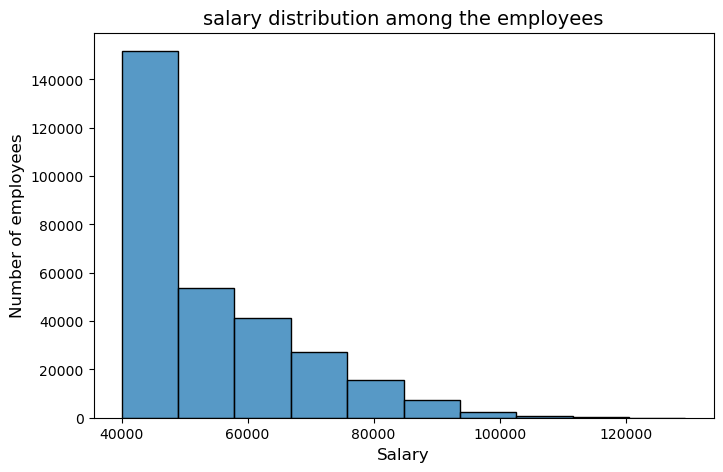

In [26]:
# 9. Histogram to show the salary distribution among the employees

unique_filtered_employees = emp_df.drop_duplicates(subset=['emp_no']).copy()
plt.figure(figsize=(8,5))
sns.histplot(unique_filtered_employees['salary'],bins=10)

plt.title('salary distribution among the employees',fontsize=14)
plt.xlabel('Salary',fontsize=12)
plt.ylabel('Number of employees',fontsize=12)

plt.show()
# plt.title('Salary Distribution Among Employees', fontsize=14)
# plt.xlabel('Salary', fontsize=12)
# plt.ylabel('Number of Employees', fontsize=12)

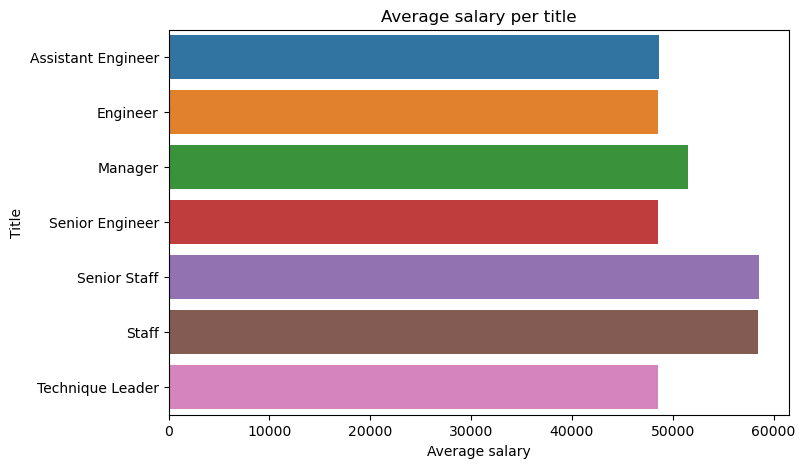

In [27]:
# 10. Bar graph to show the Average salary per title (designation)

avg_salary= emp_df.groupby('title')['salary'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='salary',y='title',data=avg_salary)

plt.title('Average salary per title')
plt.xlabel('Average salary')
plt.ylabel('Title')
plt.show()


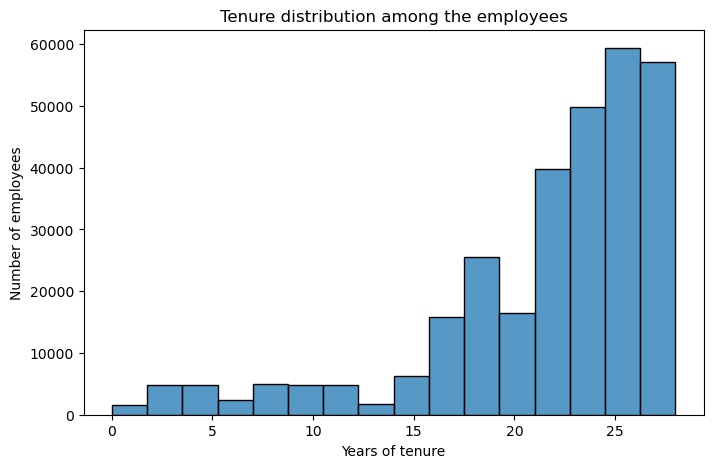

In [28]:
 # 11. Calculate employee tenure & show the tenure distribution among the employees

# current_date= datetime.now()
# Create filtered unique employees dataset
unique_filtered_employees = emp_df.drop_duplicates(subset=['emp_no']).copy()
unique_filtered_employees['tenure'] = np.where(
    unique_filtered_employees['last_date'].notna(),
    (unique_filtered_employees['last_date'] - unique_filtered_employees['hire_date']).dt.days // 365,
    (unique_filtered_employees['last_date'].max() - unique_filtered_employees['hire_date']).dt.days // 365
)

plt.figure(figsize=(8,5))
sns.histplot(unique_filtered_employees['tenure'],bins=16)

plt.title('Tenure distribution among the employees')
plt.xlabel('Years of tenure')
plt.ylabel('Number of employees')
plt.show()                          

In [29]:
# employees work under each manager

emp=emp_df.loc[emp_df['title']!='Manager',['title','emp_no','dept_no']]
manager=emp_df.loc[emp_df['title']=='Manager',['title','emp_no','dept_no']]

# Rename 'emp_no' to 'manager_emp_no' in manager table
manager = manager.rename(columns={'emp_no': 'manager_emp_no'})

emp1=emp.merge(manager[['manager_emp_no','dept_no']],on='dept_no',how='left')

emp1.groupby(by=['title','manager_emp_no'])[['emp_no']].count().reset_index()


,title,manager_emp_no,emp_no
0,Assistant Engineer,110303,2474
1,Assistant Engineer,110344,2474
2,Assistant Engineer,110386,2474
3,Assistant Engineer,110420,2474
4,Assistant Engineer,110511,2987
...,...,...,...
99,Technique Leader,111534,393
100,Technique Leader,111692,309
101,Technique Leader,111784,309
102,Technique Leader,111877,309


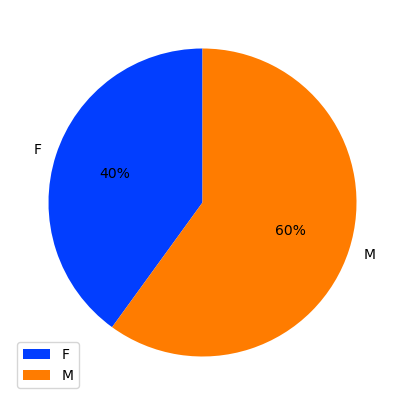

In [30]:
# employees and their gender
x=emp_df[['emp_no','sex']].drop_duplicates()
y=x.groupby(['sex'])[['emp_no']].agg(Count_of_employees=('emp_no', np.count_nonzero)).reset_index()
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
plt.figure(figsize=(8,5))
plt.pie(y['Count_of_employees'],labels=y['sex'],colors=palette_color, autopct='%.0f%%',startangle=90)
plt.legend()
plt.show()

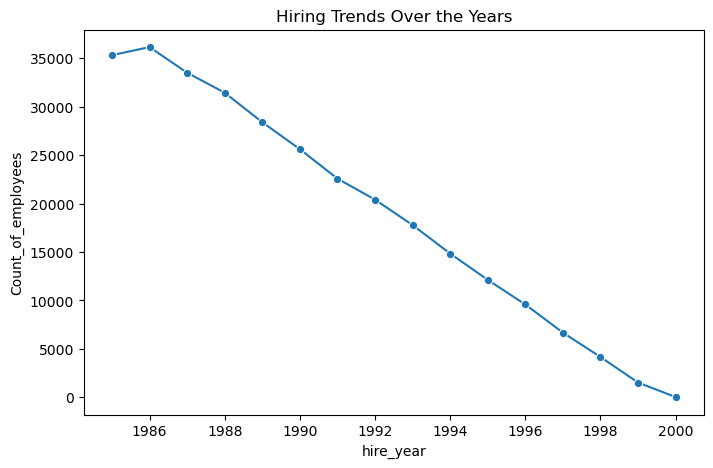

In [31]:
# Hiring Trends Over the Years
unique_filtered_employees = emp_df.drop_duplicates(subset=['emp_no'])
emp_df['hire_year']=unique_filtered_employees['hire_date'].dt.year
x1=emp_df.groupby(['hire_year'])[['emp_no']].agg(Count_of_employees=('emp_no', np.count_nonzero)).reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='hire_year',y='Count_of_employees',data=x1,marker='o')

plt.title('Hiring Trends Over the Years')
plt.xlabel('hire_year')
plt.ylabel('Count_of_employees')
plt.show()

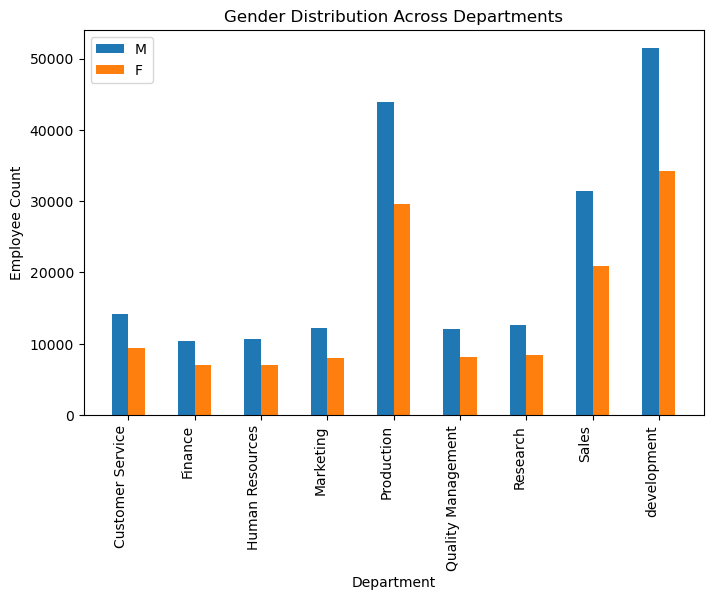

In [32]:
# Number of employees in each department

a=(emp_df.groupby(['dept_name','sex'])[['emp_no']].agg(count_of_emp=('emp_no', np.count_nonzero)).reset_index())
m=a.loc[a['sex']=='M',['sex','dept_name','count_of_emp']]
f=a.loc[a['sex']=='F',['sex','dept_name','count_of_emp']]
n=9
r=np.arange(n)
width=0.25
plt.figure(figsize=(8,5))
plt.bar(r,m['count_of_emp'],width = width,label='M')
plt.bar(r+width,f['count_of_emp'],width = width,label='F')
plt.xticks(r + width/2, m['dept_name'], rotation=90, ha='right')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.title('Gender Distribution Across Departments')
plt.legend()
plt.show()


In [33]:
# emp having highest salaries

emp_df[['emp_no','salary']].sort_values(by='salary',ascending=False).head(10)

,emp_no,salary
116071,205000,129492
37794,44188,127238
270536,444756,127041
285511,458302,126703
30467,37558,125469
217591,296857,124357
11054,20004,123749
109784,109334,123668
303373,474456,123477
303625,474684,122726


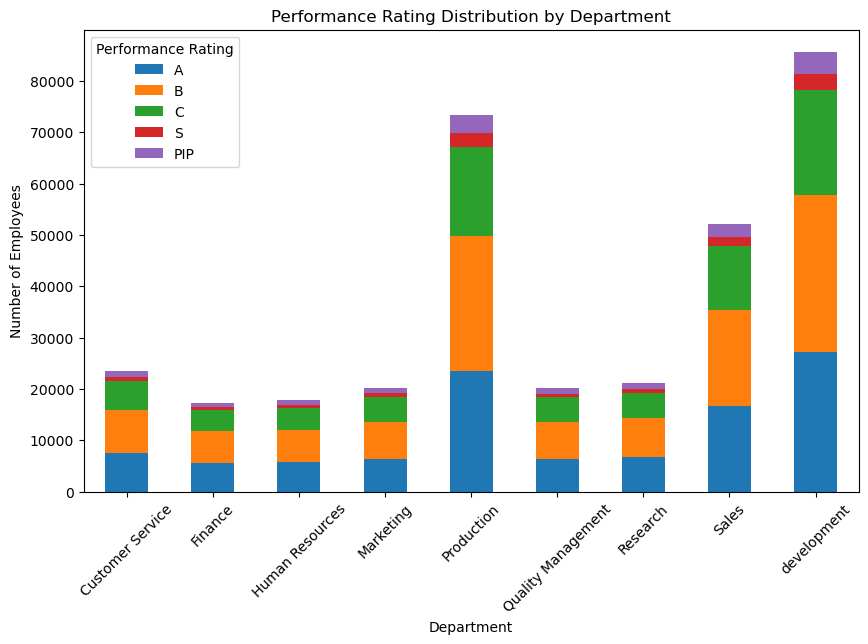

In [34]:
# emp and their ratings

performance_count = emp_df.groupby('dept_name').agg(
    A=('Last_performance_rating', lambda x: (x == 'A').sum()),
    B=('Last_performance_rating', lambda x: (x == 'B').sum()),
    C=('Last_performance_rating', lambda x: (x == 'C').sum()),
    S=('Last_performance_rating', lambda x: (x == 'S').sum()),
    PIP=('Last_performance_rating', lambda x: (x == 'PIP').sum())
).reset_index()

# print(performance_count)
# Set department names as index
performance_count.set_index('dept_name', inplace=True)

# Plot stacked bar chart
ax = performance_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels
plt.title("Performance Rating Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title="Performance Rating")
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the plot
plt.show()
